In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

class Regresion_Lineal:
    colores = ['blue', 'gray','green','brown','red','black','yellow']
    nombre_col=['col0','col1','col2','col3','col4','col5']
    # parametro a DataFrame, parametro b = porcentaje%
    def creacion_dataframe(self, df, por):
        self.df = df
        self.por= por
        df = pd.DataFrame(df)
        df=df.sample(frac=por)
        return df
    
    def eliminacion_na(self, df_na):
        self.df_na = df_na
        df_na = df_na.dropna()
        return df_na

    def datos_estadisticos(self, df_x):
        self.df_x = df_x
        return df_x.describe()
    
    def grafica_histogramas(self, df_grafhisto):
        self.df_grafhisto = df_grafhisto
        fig, axes = plt.subplots(1, 6, figsize=(20, 5))
        fig.tight_layout()

        for i in range(0,6):
            sns.histplot(ax=axes[i], data=df_grafhisto.iloc[:,i], color=self.colores[i], bins=20, kde=True)
            
    def grafica_heatmap(self, df_grafheatmap):
        self.df_grafheatmap = df_grafheatmap
        sns.heatmap(df_grafheatmap.corr(),cmap='Greys', annot=True)
        
    def grafica_correlation(self, df_graphc):
        self.df_graphc = df_graphc
        fig_1, axes_corr = plt.subplots(6, 6,figsize=(13,10))
        df_correlation_graph = df_graphc.corr().round(2)
        for row_graph in range(0,6):
            for column_graph in range(0,6): 
                axes_corr[row_graph,column_graph].scatter(df_graphc.iloc[:,row_graph],df_graphc.iloc[:,column_graph])
                axes_corr[row_graph,column_graph].set_title("C: " + str(df_correlation_graph.iloc[row_graph,column_graph]))
        plt.tight_layout()
        
    #Definiendo el producto punto para calcular el valor de Y_estimado
    def calcular_modelo(self,w,b,x):
        self.w = w
        self.b = b
        self.x = x
        x_T = np.array([x,np.ones_like(x)])
        #Al momento de multiplicar la matriz x con los valores iniciales, es necesario calcular la Transpuesta
        #de la matriz x
        # Antes de realizar la transpuesta [1,2].[961,2]
        # Despues de realizar la transpuesta [1,2].[2,961]
        return np.dot(x_T.T,[w,b])

    #Calculando el error entre la estimación y la observación
    def calcular_error(self,y,y_):
        self.y = y
        self.y_ = y_
        N=y.shape[0]
        error = np.sum((y-y_)**2)/N
        return error

    #Calculando la funcion a minimizar para reducir el error
    def gradiente_descendente(self,w_, b_, alpha, x, y):
        self.w_ = w_
        self.b_ = b_
        self.alpha = alpha
        self.x = x
        self.y = y
        
        N= x.shape[0]
        dw=-(2/N)*np.sum(x*(y-(w_*x+b_)))
        db=-(2/N)*np.sum(y-(w_*x+b_))
    
        #Actualizando los pesos para los valores w y b 
        w = w_ - alpha*dw
        b = b_ - alpha*db
        
        return w, b        
    
    #Grafica de evolucion de error con respecto del tiempo
    def grafica_error_tiempo(self,epochs_N, error):
        self.epochs_N = epochs_N
        self.error = error
        plt.subplot(1,2,1)
        plt.plot(range(epochs_N),error,color='red')
        plt.xlabel('epoch')
        plt.ylabel('ECM')
        plt.title('Error Vs Tiempo')
        plt.tight_layout()
    

In [130]:
df_in=pd.DataFrame(np.load('proyecto_training_data.npy'))
df_in.columns = Regresion_Lineal().nombre_col

Entrenamiento_data=Regresion_Lineal()
Test_data = Regresion_Lineal()

#Eliminando datos null del dataFrame original
df_in = Entrenamiento_data.eliminacion_na(df_in)

#Separando el data frame en 20%(Datos de prueba) y 80%(Datos de entrenamiento) de manera aleatoria
df_test = Test_data.creacion_dataframe(df_in,0.2)
df_training = Entrenamiento_data.creacion_dataframe(df_in,0.8)

#Mostrando datos estadisticos, max, min, std, mean ...
print("Las longitudes de los sets son: ","Set Validacion " + str(len(df_test)),"Set Entrenamiento " + str(len(df_training)))
print("Los Datos estadisticos para cada una de las varibles en el DataFrame de entrenamiento son: ")
Entrenamiento_data.datos_estadisticos(df_training)

Las longitudes de los sets son:  Set Validacion 240 Set Entrenamiento 961
Los Datos estadisticos para cada una de las varibles en el DataFrame de entrenamiento son: 


,col0,col1,col2,col3,col4,col5
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,180984.715921,6.119667,1164.262227,6.537981,1970.604579,69.790843
std,83707.711474,1.410983,390.712191,1.640904,31.730173,24.754944
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,128000.000000,5.000000,894.000000,5.000000,1950.000000,59.000000
50%,159500.000000,6.000000,1089.000000,6.000000,1972.000000,70.000000
75%,213500.000000,7.000000,1383.000000,7.000000,2003.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


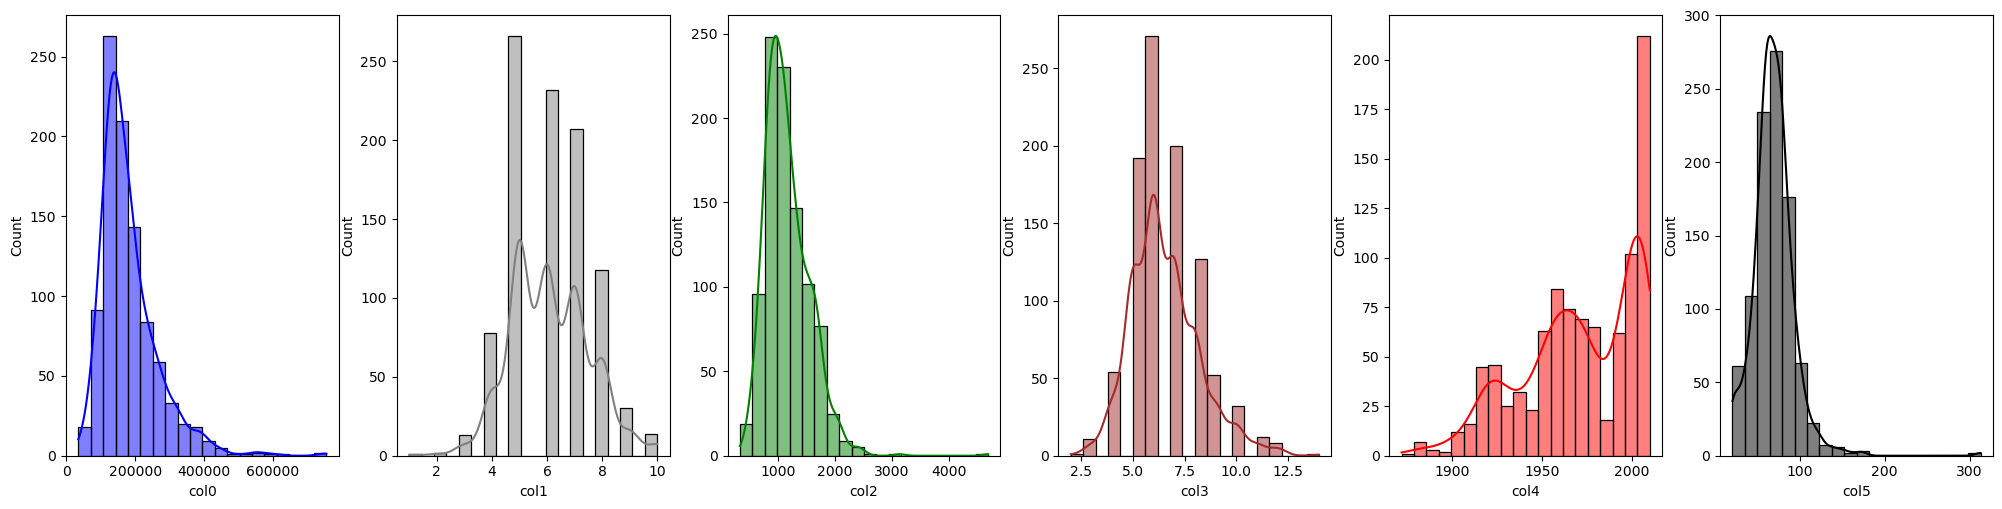

In [131]:
#Grafica Histogramas de cada una de las variables del DataFrame utilizando seaborn
Entrenamiento_data.grafica_histogramas(df_training)

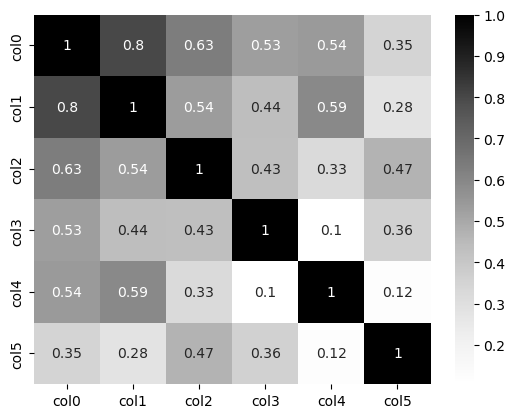

In [132]:
#Calculando la correlación entre cada una de las variables del DataFrame de Entrenamiento
Entrenamiento_data.grafica_heatmap(df_training)

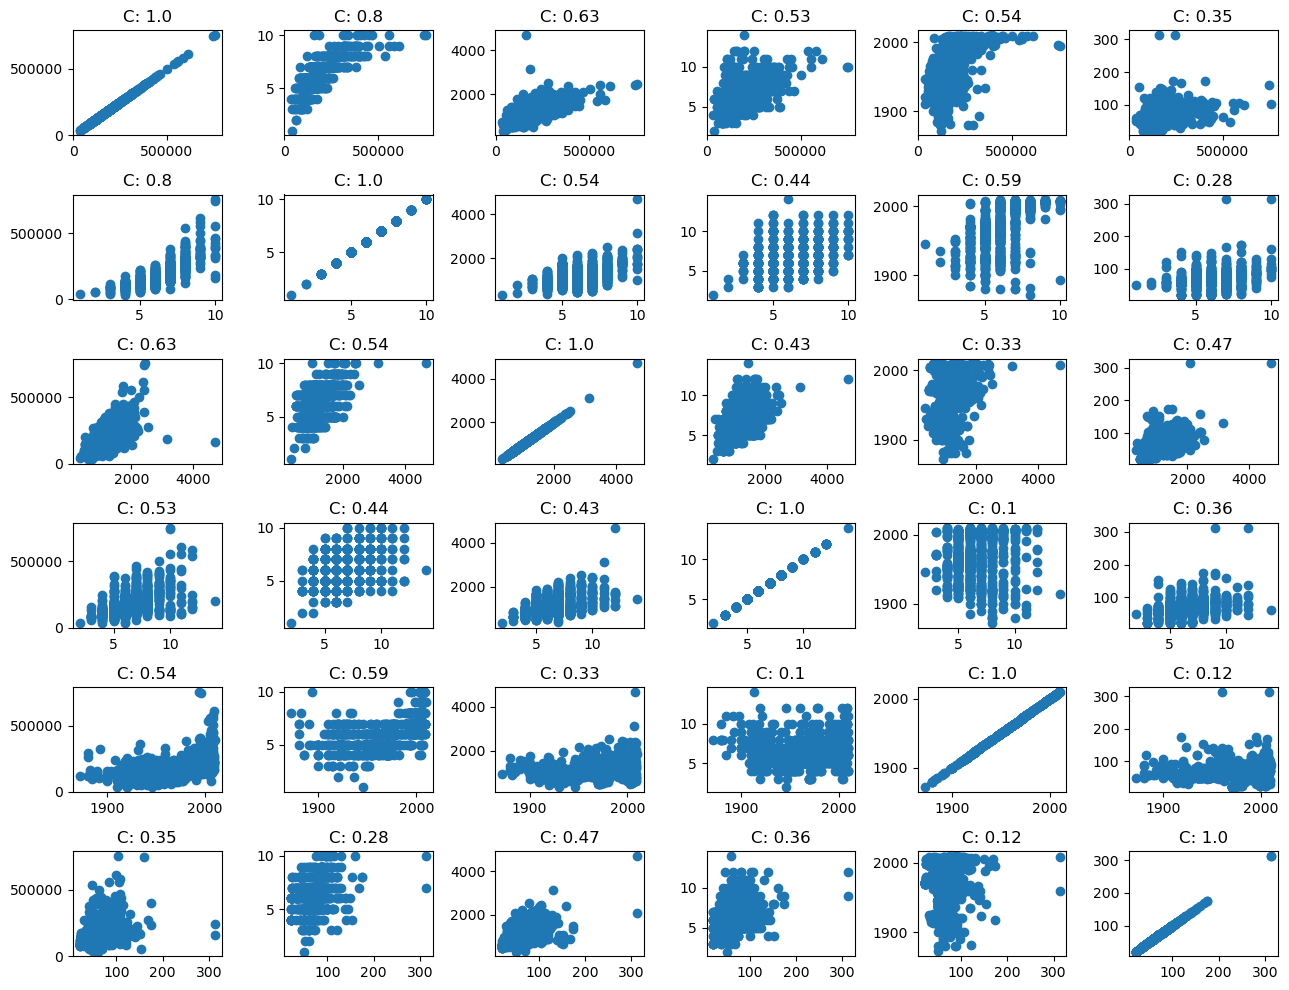

In [133]:
#Graficas de dispersion con el Coeficiente de correlacion como título de la gráfica
Entrenamiento_data.grafica_correlation(df_training)

{'5': 9919.380470985947, '0': array([1.94429664e+10])}

Epoch 500
w: 9919.4 b: 1467.6
error: [1.94429664e+10]

{'1': 16517.763111540145, '0': array([1.04308153e+10])}

Epoch 1000
w: 16517.8 b: 2435.6
error: [1.04308153e+10]

{'1': 20925.74140539334, '5': 3063.2151113447276, '0': array([6.41380606e+09])}

Epoch 1500
w: 20925.7 b: 3063.2
error: [6.41380606e+09]

{'2': 23871.398480246167, '0': array([4.62309853e+09])}

Epoch 2000
w: 23871.4 b: 3463.7
error: [4.62309853e+09]

{'2': 25840.804580422733, '5': 3712.5518774867032, '0': array([3.82463919e+09])}

Epoch 2500
w: 25840.8 b: 3712.6
error: [3.82463919e+09]

{'3': 27158.461501936323, '0': array([3.46841859e+09])}

Epoch 3000
w: 27158.5 b: 3860.2
error: [3.46841859e+09]

{'3': 28041.007512523243, '5': 3940.216692305803, '0': array([3.3093012e+09])}

Epoch 3500
w: 28041.0 b: 3940.2
error: [3.3093012e+09]

{'4': 28633.070899913808, '0': array([3.23803174e+09])}

Epoch 4000
w: 28633.1 b: 3975.2
error: [3.23803174e+09]



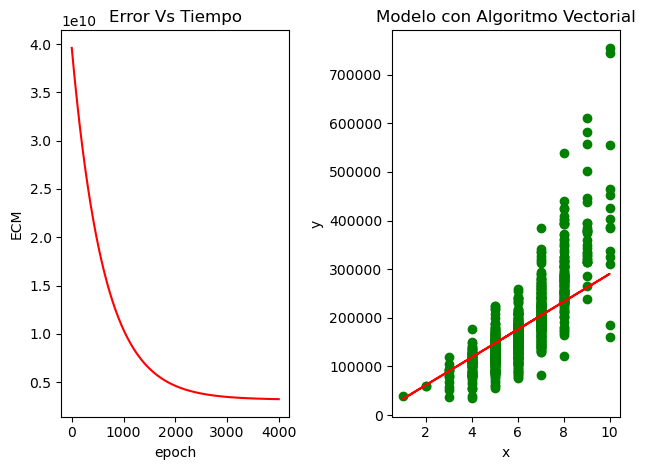

In [162]:
#Seleccionando las columnas a utilizar para el modelo
df_training.plot.scatter(x='col1', y='col0')

#Creando el vector de la variable dependiente
x_0 = df_training['col1'].values
#Creando el vector de la variable independiente
y = df_training['col0'].values

#Inicializando los valores de w y b
w= 40
b= -10

#Parametro de learning rate y cantidad de iteraciones
alpha = 0.00001
epochs_N = 4000

#Vector que almacena el error
error = np.zeros((epochs_N,1))

for i in range(epochs_N):
    #Funcion modelo 1
    [w,b]= Entrenamiento_data.gradiente_descendente(w,b,alpha,x_0,y)
    y_ = Entrenamiento_data.calcular_modelo(w,b,x_0)
    error[i]=Entrenamiento_data.calcular_error(y,y_)
    
    #Almacenar resultados en diccionario key = epochs_N
    #result[i+1] = dict([(i+1,[w,b,error[i]])])
    llave = str(i+1)
    valor = [w, b, error[i]]
       
    
    #Impresión de error, w, b cada i veces
    if (i+1)%500 == 0:
        print(result[str(i+1)])
        print()
        print("Epoch {}".format(i+1))
        print("w: {:.1f}".format(w), "b: {:.1f}".format(b))
        print("error: {}".format(error[i]))
        print("===================================")
        print()
           
Entrenamiento_data.grafica_error_tiempo(epochs_N, error)

y_regr = Entrenamiento_data.calcular_modelo(w,b,x_0)
plt.subplot(1,2,2)
plt.scatter(x_0,y, color='green')
plt.plot(x_0,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modelo con Algoritmo Vectorial')
plt.tight_layout()

Coeficientes:  [[47373.08318887]]
Intersección:  [-108922.77859912]


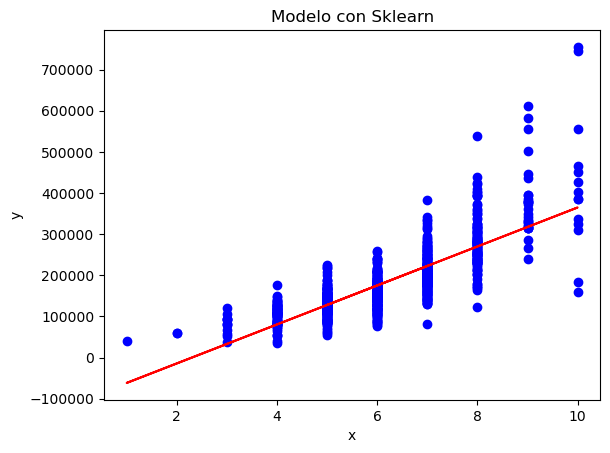

In [163]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regres_sklearn = linear_model.LinearRegression()
x_1 = np.asanyarray(df_training[['col1']])
y_1 = np.asanyarray(df_training[['col0']])

regres_sklearn.fit(x_1,y_1)

print('Coeficientes: ', regres_sklearn.coef_)
print('Intersección: ', regres_sklearn.intercept_)

plt.scatter(x_0,y,color='blue')
plt.plot(x_1,regres_sklearn.coef_[0][0]*x_1 + regres_sklearn.intercept_[0], '-r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Modelo con Sklearn")
plt.show()



In [165]:
print(llave, valor[)

4000 28633.070899913808
